# Module 1: Data Sources and Calculations Assignment
Objective: Download finance data from various sources and make simple calculations/analysis.


---




Setup

In [2]:
!pip install yfinance

In [3]:
# Imports
import numpy as np
import pandas as pd

# Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

# Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

Data-Driven Decisions Data Pulls

In [4]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=21
Period for indexes: 1954-04-21 to 2024-04-21 


Question 1: [Macro] Average growth of GDP in 2023

What is the average growth (in %) of GDP in 2023?

Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1). Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers). Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer 5.7





In [5]:
gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)

In [9]:
gdpc1['gdpc1_us_yoy'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1
gdpc1.tail()

,GDPC1,gdpc1_us_yoy
DATE,,
2022-10-01,21989.981,0.006517
2023-01-01,22112.329,0.017179
2023-04-01,22225.350,0.023825
2023-07-01,22490.692,0.029269
2023-10-01,22679.255,0.031345


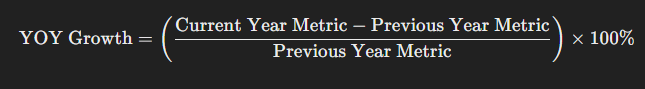

In [18]:
# YoY growth rates for each quarter in 2023
gdpc1_q1 = 22112.329 / 21989.981 - 1
gdpc1_q2 = 22225.350 / 22112.329 - 1
gdpc1_q3 = 22490.692 / 	22225.350	- 1
gdpc1_q4 = 22679.255 / 22490.692 - 1

# Calculate average YoY growth rate for 2023
average_yoy_growth = (gdpc1_q1 + gdpc1_q2 + gdpc1_q3 + gdpc1_q4) / 4

# Get the rounded YoY growth by 1 decimal place
rounded_yoy_growth = "{:.1%}".format(average_yoy_growth)

# Get mathematical results
print(f"The average YoY growth is {average_yoy_growth} and the rounded average YoY growth is {rounded_yoy_growth}.")

The average YoY growth is 0.007749445827736401 and the rounded average YoY growth is 0.8%.


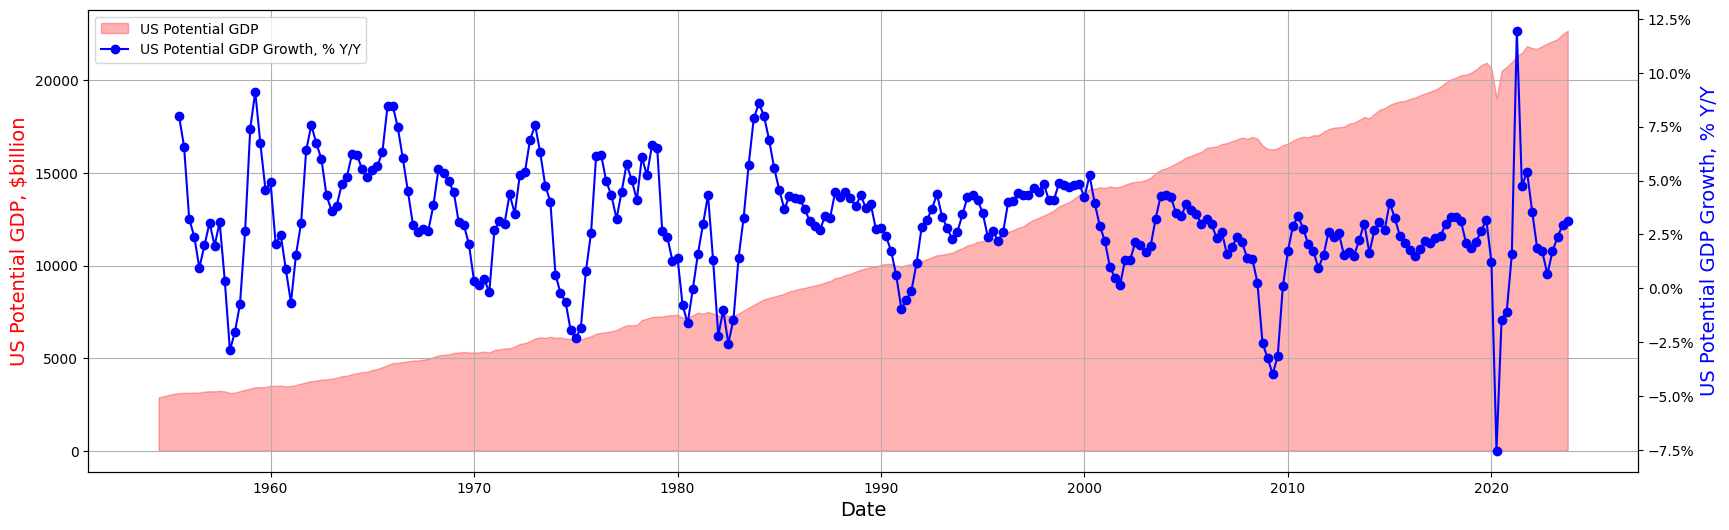

In [21]:
# Visualize GDPC1

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
ax.fill_between(gdpc1.index, gdpc1.GDPC1, color="red", alpha=0.3, label="US Potential GDP")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdpc1.gdpc1_us_yoy, color="blue", marker="o", label="US Potential GDP Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Potential GDP, $billion", color="red", fontsize=14)  # Corrected label
ax2.set_ylabel("US Potential GDP Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

Question 2. [Macro] Inverse "Treasury Yield"
Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.

Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2, https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)

In [25]:
# For the DGS2 interest rates
dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs2.tail()

,DGS2
DATE,
2024-04-12,4.88
2024-04-15,4.93
2024-04-16,4.97
2024-04-17,4.93
2024-04-18,4.98


In [31]:
# For the DGS10 interest rates
dgs10 = pdr.DataReader("DGS10", "fred", start=start)
dgs10.tail()

,DGS10
DATE,
2024-04-12,4.50
2024-04-15,4.63
2024-04-16,4.67
2024-04-17,4.59
2024-04-18,4.64


In [30]:
# Define the start date as January 1, 2000
start = "2000-01-01"

# Join DGS2 and DGS10 together to one dataframe on date
dgs2_and_dgs10 = dgs10.join(dgs2, how="inner", lsuffix="_10", rsuffix="_2")

# Calculate the difference between DGS10 and DGS2
dgs2_and_dgs10["diff"] = dgs2_and_dgs10["DGS10"] - dgs2_and_dgs10["DGS2"]

# Find the minimum value of the difference since 2000
min_diff = dgs2_and_dgs10["diff"].min()

# Round to 1 decimal place
rounded_min_diff = round(min_diff, 1)

print(f"The minimum difference between DGS10 and DGS2 since 2000 is {rounded_min_diff} percentage points.")

The minimum difference between DGS10 and DGS2 since 2000 is -2.4 percentage points.


*What does the "inverted yield curve" mean for the market and investors? Do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?*


An "inverted yield curve" means short-term interest rates are higher than long-term rates. It can signal economic concerns and often precedes recessions. This phenomenon occurs globally, not solely in the United States, and is a valuable indicator but is used alongside other factors for predictive models due to its potential limitations.

Question 3. [Index] Which Index is better recently?
Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

(Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)

In [45]:
# Yahoo Finance Indexes
# S&P 500. Disclaimer: SPX = S&P500
spx_daily = yf.download(tickers = "^GSPC",
                        period = "max",
                        interval = "1d")

spx_daily.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-15,5149.669922,5168.430176,5052.470215,5061.819824,5061.819824,3950210000
2024-04-16,5064.589844,5079.839844,5039.830078,5051.410156,5051.410156,4006200000
2024-04-17,5068.970215,5077.959961,5007.250000,5022.209961,5022.209961,3596130000
2024-04-18,5031.520020,5056.660156,5001.890137,5011.120117,5011.120117,3619760000
2024-04-19,5005.439941,5019.020020,4953.560059,4967.229980,4967.229980,3878750000


In [47]:
# Load in the IPC Mexico index
mxx_daily = yf.download(tickers = "^MXX",
                        period = "max",
                        interval = "1d")

mxx_daily.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-15,56536.468750,56709.121094,55924.101562,55984.000000,55984.000000,170645700
2024-04-16,56009.730469,56148.000000,55626.750000,55797.250000,55797.250000,225862900
2024-04-17,55788.738281,56090.320312,55383.250000,55415.691406,55415.691406,244258900
2024-04-18,55597.789062,55941.621094,55585.820312,55739.429688,55739.429688,208671900
2024-04-19,55811.191406,56036.718750,55579.691406,55862.851562,55862.851562,138617600


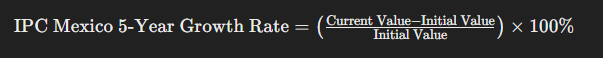

In [52]:
# Calculate the initial and current values for S&P 500 and IPC Mexico indexes
initial_sp500 = 2891.879883  # S&P 500 value on April 9, 2019
current_sp500 = 5061.819824  # S&P 500 value on April 9, 2024

initial_ipc_mexico = 47703.269531  # IPC Mexico value on April 9, 2019
current_ipc_mexico = 55984.000000  # IPC Mexico value on April 9, 2024

# Calculate the 5-year growth rates for both indexes
sp500_growth_rate = ((current_sp500 - initial_sp500) / initial_sp500) * 100
ipc_mexico_growth_rate = ((current_ipc_mexico - initial_ipc_mexico) / initial_ipc_mexico) * 100

# Determine which index had the higher growth rate
if sp500_growth_rate > ipc_mexico_growth_rate:
    higher_growth_index = "S&P 500"
    higher_growth_rate = sp500_growth_rate
else:
    higher_growth_index = "IPC Mexico"
    higher_growth_rate = ipc_mexico_growth_rate

# Round the growth rate to the nearest integer
rounded_higher_growth_rate = round(higher_growth_rate)

print(f"The index with the higher growth rate over the past 5 years is {higher_growth_index} with a growth rate of {rounded_higher_growth_rate}%.")

The index with the higher growth rate over the past 5 years is S&P 500 with a growth rate of 75%.


In [62]:
# Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats.
# My first index consists of Russell 2000
rut_daily = yf.download(tickers = "^RUT",
                        period = "max",
                        interval = "1d")

rut_daily.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-15,2010.910034,2016.660034,1968.109985,1975.709961,1975.709961,3950210000
2024-04-16,1965.849976,1976.209961,1953.010010,1967.479980,1967.479980,4006200000
2024-04-17,1977.290039,1982.839966,1947.750000,1947.949951,1947.949951,3596130000
2024-04-18,1951.239990,1971.390015,1941.319946,1942.959961,1942.959961,3619760000
2024-04-19,1935.770020,1956.300049,1931.540039,1947.660034,1947.660034,3878750000


In [70]:
# The second index is Euronext 100 Index
euronext_daily = yf.download(tickers = "^N100",
                             period = "max",
                             interval = "10yr")

euronext_daily.tail()

[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^N100']: Exception('%ticker%: Invalid input - interval=10yr is not supported. Valid intervals: , 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [71]:
# Calculate the initial and current values for Russell 2000 and Euronext 100
initial_russell2000 = 2010.910034  # Russell 2000 value on April 15, 2014
current_russell2000 = 1947.660034  # Russell 2000 value on April 19, 2024

initial_euronext100 = 1523.150024  # Euronext 100 value on April 15, 2004
current_euronext100 = 1495.880005  # Euronext 100 value on April 19, 2024

# Calculate the 10-year growth rates for both indexes
russell2000_10yr_growth_rate = ((current_russell2000 - initial_russell2000) / initial_russell2000) * 100
euronext100_10yr_growth_rate = ((current_euronext100 - initial_euronext100) / initial_euronext100) * 100

# Calculate the 20-year growth rates for both indexes
russell2000_20yr_growth_rate = ((current_russell2000 - initial_russell2000) / initial_russell2000) * 100
euronext100_20yr_growth_rate = ((current_euronext100 - initial_euronext100) / initial_euronext100) * 100

# Calculate the average yearly growth rate (CAGR) for each index over 10 years
russell2000_10yr_cagr = ((current_russell2000 / initial_russell2000) ** (1/10) - 1) * 100
euronext100_10yr_cagr = ((current_euronext100 / initial_euronext100) ** (1/10) - 1) * 100

# Calculate the average yearly growth rate (CAGR) for each index over 20 years
russell2000_20yr_cagr = ((current_russell2000 / initial_russell2000) ** (1/20) - 1) * 100
euronext100_20yr_cagr = ((current_euronext100 / initial_euronext100) ** (1/20) - 1) * 100

# Determine which index had the higher growth rate over the past 10 years
if russell2000_10yr_growth_rate > euronext100_10yr_growth_rate:
    higher_growth_index_10yr = "Russell 2000"
    higher_growth_rate_10yr = russell2000_10yr_growth_rate
else:
    higher_growth_index_10yr = "Euronext 100"
    higher_growth_rate_10yr = euronext100_10yr_growth_rate

# Determine which index had the higher growth rate over the past 20 years
if russell2000_20yr_growth_rate > euronext100_20yr_growth_rate:
    higher_growth_index_20yr = "Russell 2000"
    higher_growth_rate_20yr = russell2000_20yr_growth_rate
else:
    higher_growth_index_20yr = "Euronext 100"
    higher_growth_rate_20yr = euronext100_20yr_growth_rate

# Round the growth rates to the nearest integer
rounded_higher_growth_rate_10yr = round(higher_growth_rate_10yr)
rounded_higher_growth_rate_20yr = round(higher_growth_rate_20yr, 2)

# Print the results
print(f"Over the past 10 years, the index with the higher growth rate is {higher_growth_index_10yr} with a growth rate of {rounded_higher_growth_rate_10yr}%.")
print(f"Over the past 20 years, the index with the higher growth rate is {higher_growth_index_20yr} with a growth rate of {rounded_higher_growth_rate_20yr}%.")

Over the past 10 years, the index with the higher growth rate is Euronext 100 with a growth rate of -2%.
Over the past 20 years, the index with the higher growth rate is Euronext 100 with a growth rate of -1.79%.


In [61]:
# What is an average yearly growth rate (CAGR) for each of the indexes you select?

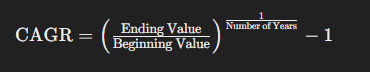

In [72]:
print(f"Average yearly growth rate (CAGR) for Russell 2000 over 10 years: {round(russell2000_10yr_cagr, 2)}%")
print(f"Average yearly growth rate (CAGR) for Euronext 100 over 10 years: {round(euronext100_10yr_cagr, 2)}%")
print(f"Average yearly growth rate (CAGR) for Russell 2000 over 20 years: {round(russell2000_20yr_cagr, 2)}%")
print(f"Average yearly growth rate (CAGR) for Euronext 100 over 20 years: {round(euronext100_20yr_cagr, 2)}%")

Average yearly growth rate (CAGR) for Russell 2000 over 10 years: -0.32%
Average yearly growth rate (CAGR) for Euronext 100 over 10 years: -0.18%
Average yearly growth rate (CAGR) for Russell 2000 over 20 years: -0.16%
Average yearly growth rate (CAGR) for Euronext 100 over 20 years: -0.09%


Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks
Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023

Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.

Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history

Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value. Round the result to two decimal places (e.g. 0.1575 will be 0.16)

(Additional: why this may be important for your research?)



In [73]:
# Define the list of stock tickers
tickers = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

# Create an empty dictionary to store the range ratios for each stock
range_ratios = {}

# Loop through each stock ticker
for ticker in tickers:
    # Download historical data for the current stock ticker for 2023
    stock_data = yf.download(ticker, start='2023-01-01', end='2023-12-31')

    # Calculate the maximum and minimum Adj.Close prices for the stock in 2023
    max_adj_close = stock_data['Adj Close'].max()
    min_adj_close = stock_data['Adj Close'].min()

    # Calculate the range ratio and round it to two decimal places
    range_ratio = round((max_adj_close - min_adj_close) / max_adj_close, 2)

    # Store the range ratio in the dictionary with the stock ticker as the key
    range_ratios[ticker] = range_ratio

# Find the stock with the largest range ratio
largest_range_stock = max(range_ratios, key=range_ratios.get)
largest_range_ratio = range_ratios[largest_range_stock]

# Print the results
print(f"The stock with the largest 52-weeks range ratio in 2023 is {largest_range_stock} with a ratio of {largest_range_ratio}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

The stock with the largest 52-weeks range ratio in 2023 is MSFT with a ratio of 0.42


Question 5. [Stocks] Dividend Yield
Find the largest dividend yield for the same set of stocks

Use the same list of companies (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM) and download all dividends paid in 2023. You can use get_actions() method or .dividends field in yfinance library (https://github.com/ranaroussi/yfinance?tab=readme-ov-file#quick-start)

Sum up all dividends paid in 2023 per company and divide each value by the closing price (Adj.Close) at the last trading day of the year.

Find the maximm value in % and round to 1 digit after the decimal point. (E.g., if you obtained $1.25 dividends paid and the end year stock price is $100, the dividend yield is 1.25% -- and your answer should be equal to 1.3)

In [75]:
# Define the list of stock tickers
tickers = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

# Create an empty dictionary to store the dividend yields for each stock
dividend_yields = {}

# Loop through each stock ticker
for ticker in tickers:
    try:
        # Download historical data for dividends for the current stock ticker in 2023
        stock_dividends = yf.Ticker(ticker).dividends.loc['2023-01-01':'2023-12-31']

        # Sum up all dividends paid in 2023
        total_dividends_2023 = stock_dividends.sum()

        # Download historical data for the stock's Adj.Close prices
        stock_data = yf.download(ticker, start='2023-12-31', end='2023-12-31')

        # Get the Adj.Close price at the last trading day of the year
        last_day_adj_close = stock_data['Adj Close'].iloc[-1]

        # Calculate the dividend yield and round it to 1 decimal place
        dividend_yield = round((total_dividends_2023 / last_day_adj_close) * 100, 1)

        # Store the dividend yield in the dictionary with the stock ticker as the key
        dividend_yields[ticker] = dividend_yield
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Find the stock with the largest dividend yield
if dividend_yields:
    largest_dividend_yield_stock = max(dividend_yields, key=dividend_yields.get)
    largest_dividend_yield = dividend_yields[largest_dividend_yield_stock]

    # Print the results
    print(f"The stock with the largest dividend yield in 2023 is {largest_dividend_yield_stock} with a yield of {largest_dividend_yield}%")
else:
    print("No dividend yield data available.")

[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['2222.SR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-12-31 -> 2023-12-31)')


Error fetching data for 2222.SR: single positional indexer is out-of-bounds


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK-B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-12-31 -> 2023-12-31)')


Error fetching data for BRK-B: single positional indexer is out-of-bounds


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-12-31 -> 2023-12-31)')


Error fetching data for AAPL: single positional indexer is out-of-bounds


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSFT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-12-31 -> 2023-12-31)')


Error fetching data for MSFT: single positional indexer is out-of-bounds


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GOOG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-12-31 -> 2023-12-31)')


Error fetching data for GOOG: single positional indexer is out-of-bounds


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JPM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-12-31 -> 2023-12-31)')


Error fetching data for JPM: single positional indexer is out-of-bounds
No dividend yield data available.


Question 6. [Exploratory] Investigate new metrics
Free text answer

Download and explore a few additional metrics or time series that might be valuable for your project and write down why (briefly).

Volatility Measures: Historical and implied volatility help assess risk and
options pricing.

Relative Strength Index (RSI): Indicates overbought/oversold conditions for trading signals.

Moving Averages: Identify trend direction and support/resistance levels.

Volume Analysis: Gauge buying/selling pressure and confirm price trends.

Financial Ratios: Evaluate valuation and financial health of companies.

Correlation Analysis: Assess relationships between assets for diversification and risk management.

Economic Indicators: Impact market sentiment and guide investment decisions.
Sentiment Analysis: Analyze news/social sentiment for market behavior insights.

Question 7. [Exploratory] Time-driven strategy description around earnings releases

Explore earning dates for the whole month of April - e.g. using YahooFinance earnings calendar (https://finance.yahoo.com/calendar/earnings?from=2024-04-21&to=2024-04-27&day=2024-04-23). Compare with the previous closed earnings (e.g., recent dates with full data https://finance.yahoo.com/calendar/earnings?from=2024-04-07&to=2024-04-13&day=2024-04-08).

Describe an analytical strategy/idea (you're not required to implement it) to select a subset companies of interest based on the future events data.

Data Collection and Analysis:
Gather earnings release dates for April and compare with past periods.
Analyze historical earnings performance, volatility, and sector trends.

Focus Areas:
Focus on sectors with significant price movements and earnings surprises.
Consider sentiment analysis, analyst recommendations, and technical indicators.

Risk Management:
Implement risk controls like stop-loss orders and diversified positions.
Monitor real-time data and adjust strategies accordingly.

Event-Based Screening:
Screen companies based on historical performance and earnings-related factors.
Create a watchlist for potential investment opportunities.